## Теория оценивания

**Задача.** Пусть $x_1,\ldots,x_n$ — реализация из модели сдвига показательного закона
	с плотностью распределения 
	$$
		f_\theta(u) = e^{-\lambda(u-\theta)}\cdot I_{\{u\geq\theta\}} 
		= 
		\begin{cases}
		 	e^{-\lambda(u-\theta)}, & u\geq\theta,\\
			0, & u<\theta.
		\end{cases}
	$$	
Оценить $\theta$ с помощью метода моментов и метода максимального правдоподобия. Реализуйте эту задачу в Python:

* сгенерируйте $\theta$ из равномерного распределения на  $[1,10]$ и возьмите $\lambda=1/5$;
* сгенерируйте выборку из распределения с плотностью $f_\theta(u)$ размера  $n=1\,000$; 
* найдите значения оценок метода моментов и метода максимального правдоподобия.

In [1]:
import numpy as np


In [2]:
np.random.seed(100) # зафиксируем seed

Обратите внимание на то, что в np.random.exponential параметр scale = 1/$\lambda$.

In [21]:
n = 1000 # размер выборки

scale = 5 # параметр показательного распределения (scale)
drift = np.random.uniform(1,10) # а это сдвиг, который нам неизвестен и который мы будем оценивать

drift = 10

In [22]:
sample = drift + np.random.exponential(scale, size = n) # генерируем выборку размера n

In [23]:
import seaborn as sns

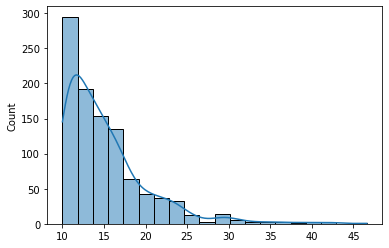

In [26]:
sns.histplot(sample, bins=20, kde=True);

In [27]:
esimate_mme = np.mean(sample) - scale  # оценка метода моментов
esimate_mle = np.min(sample) # оценка метода максимального правдоподобия

In [28]:
print("Истинное значение параметра: ", drift)
print("Оценка метода моментов: ", esimate_mme)
print("Оценка метода максимального правдоподобия: ", esimate_mle)

Истинное значение параметра:  10
Оценка метода моментов:  10.191333299962844
Оценка метода максимального правдоподобия:  10.005093801445872


In [29]:
sample.mean()

15.191333299962844

In [31]:
np.median(sample)

13.81753592503825

In [44]:
(sample.mean() - np.median(sample))/sample.std()

0.2657573335924682

In [52]:
sample = np.random.gamma(shape=2, scale=3, size=10000)

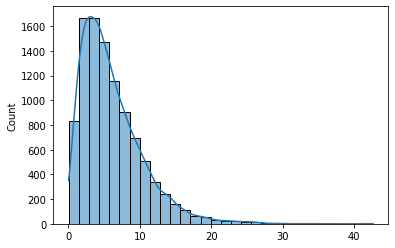

In [54]:
sns.histplot(sample, bins=30, kde=True);

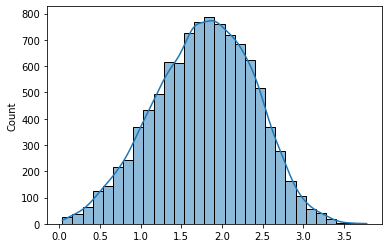

In [59]:
sns.histplot(np.log1p(sample), bins=30, kde=True);

In [69]:
sample.reshape(-1,1).shape

(10000, 1)

In [61]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=True)

In [70]:
sample_transformed = pt.fit_transform(sample.reshape(-1,1))

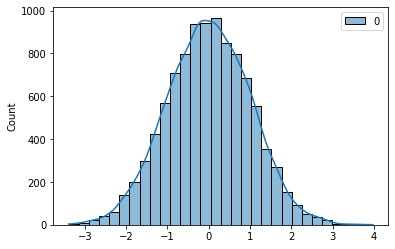

In [72]:
sns.histplot(sample_transformed, bins=30, kde=True);

In [73]:
sample_transformed.mean()

-2.6556534749033743e-16

In [74]:
sample_transformed.std()

1.0

In [39]:
sample.sort()

In [40]:
from scipy.stats import mode

In [42]:
mode(sample.round())

ModeResult(mode=array([11.]), count=array([152]))